In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [25]:
df = pd.read_csv("tables/test_new.csv")[["aerosol_type" ,"date"]]\
    .assign(
        date = lambda x: pd.to_datetime(x.date),
        year = lambda x: x.date.dt.year,
        month = lambda x: x.date.dt.month
        )

# Line Plot

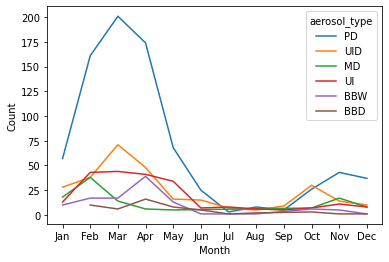

In [49]:
date_counts = df.groupby('month')['aerosol_type'].value_counts().reset_index(name='count')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = sns.lineplot(x='month', y='count', hue='aerosol_type', data=date_counts)
ax.set_ylabel("Count")
ax.set_xlabel("Month")
ax.set_xticks(range(1,13))
ax.set_xticklabels(month_order)
plt.show()

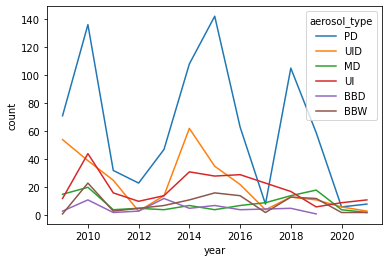

In [29]:
date_counts = df.groupby('year')['aerosol_type'].value_counts().reset_index(name='count')
ax = sns.lineplot(x='year', y='count', hue='aerosol_type', data=date_counts)
plt.show()

# Heatmap

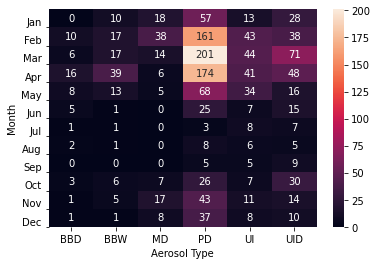

In [50]:
pivot_table = df.pivot_table(index='month', columns='aerosol_type', values='date', aggfunc='count', fill_value=0)
ax = sns.heatmap(pivot_table, annot=True, fmt='d')
ax.set_xlabel("Aerosol Type")
ax.set_ylabel("Month")
ax.set_yticks(range(1,13))
ax.set_yticklabels(month_order, va='bottom')
plt.yticks(rotation=0)
plt.show()

In [51]:
pivot_table.to_clipboard()

# Bar Graph

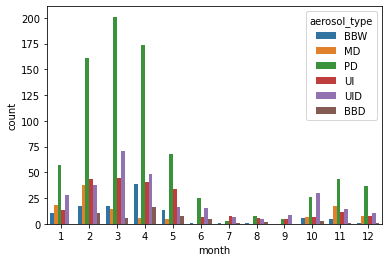

In [48]:
df_count = df.groupby(['month', 'aerosol_type']).size().reset_index(name='count')
sns.barplot(x='month', y='count', hue='aerosol_type', data=df_count)
plt.show()